In [1]:
%cd ..

e:\Shelf-Monitoring-with-YOLO


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.data_classes import Product

ok


In [3]:
model=YOLO('models/product_model.pt')

In [46]:
def detect_product(img):

    results = model(img)
    products = [Product(box) for box in results[0].boxes.xyxy]
    return products


if __name__ == "__main__":
    img = cv2.imread(r"test.jpeg")
    products = detect_product(img)


0: 640x480 126 objects, 140.8ms
Speed: 4.9ms preprocess, 140.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)


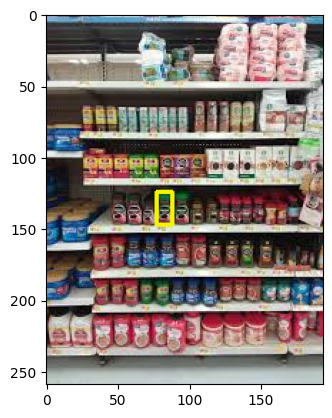

In [43]:
def draw_product(img, product):
    cv2.rectangle(img, product.p1, product.p2, color=(0,244,244),thickness=2)
    return img



if __name__ == "__main__":
    shelf=products[15]
    img_draw = draw_product(img.copy(), shelf)
    to_rgb=lambda image: cv2.cvtColor(img_draw,cv2.COLOR_BGR2RGB)
    plt.imshow(to_rgb(img_draw))



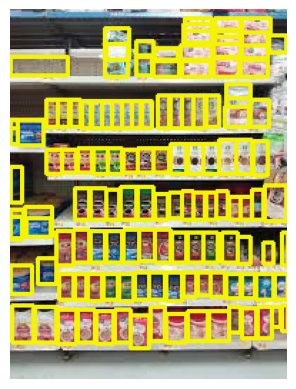

In [45]:
def draw_boxes(img,product):
    img_copy=img.copy()

    for product in products:
        draw_product(img_copy,product)

    return img_copy

if __name__ == "__main__":
    drawen_img=draw_boxes(img,products)
    to_rgb=lambda image: cv2.cvtColor(drawen_img,cv2.COLOR_BGR2RGB)   
    plt.imshow(to_rgb(drawen_img))
    plt.axis("off")
    